In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
#Before this I needed to reduce size of dataset (it decreased in 10 times). Because my PC coudn't run next commands due to lack of memory 
df = pd.read_csv('reduced.csv', sep=',')
df

,brand,model,year,body,price,car_mileage,fuel,power,transmission
0,11,816,2006.0,7,5350.0,220.0,0,2.0,2
1,29,564,2017.0,7,17000.0,211.0,0,2.0,2
2,25,852,2015.0,7,15200.0,157.0,0,2.0,2
3,11,816,2000.0,7,4999.0,300.0,0,2.0,2
4,21,762,2010.0,7,20700.0,682.0,0,3.0,1
...,...,...,...,...,...,...,...,...,...
2243,11,407,2012.0,10,9200.0,105.0,2,2.0,1
2244,13,293,2016.0,10,15500.0,64.0,2,2.0,1
2245,36,315,2018.0,10,15000.0,20.0,2,1.0,2
2246,39,50,2003.0,10,2300.0,118.0,1,2.0,2


In [4]:
df.describe()

,brand,model,year,body,price,car_mileage,fuel,power,transmission
count,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000
mean,21.274466,426.710854,2009.648742,9.693060,12394.136355,165.623665,1.184609,2.142451,1.648132
std,12.700649,231.862276,6.046701,0.909381,8842.634599,351.060482,0.870929,0.658154,0.825892
min,0.000000,2.000000,1991.301412,7.000000,1000.000000,0.000000,0.000000,1.000000,0.000000
25%,11.000000,200.000000,2007.000000,10.000000,6500.000000,80.750000,0.000000,2.000000,1.000000
50%,21.000000,420.000000,2011.000000,10.000000,10700.000000,140.000000,1.000000,2.000000,1.000000
75%,36.000000,629.000000,2014.000000,10.000000,14900.000000,200.000000,2.000000,2.000000,2.000000
max,40.000000,888.000000,2020.000000,10.000000,49750.707825,9999.000000,2.000000,4.880718,4.000000


In [5]:
df['age']=(2021-df['year'])
df['priceLevel']=np.where (df['price']<=12394,0,1)
df

,brand,model,year,body,price,car_mileage,fuel,power,transmission,age,priceLevel
0,11,816,2006.0,7,5350.0,220.0,0,2.0,2,15.0,0
1,29,564,2017.0,7,17000.0,211.0,0,2.0,2,4.0,1
2,25,852,2015.0,7,15200.0,157.0,0,2.0,2,6.0,1
3,11,816,2000.0,7,4999.0,300.0,0,2.0,2,21.0,0
4,21,762,2010.0,7,20700.0,682.0,0,3.0,1,11.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2243,11,407,2012.0,10,9200.0,105.0,2,2.0,1,9.0,0
2244,13,293,2016.0,10,15500.0,64.0,2,2.0,1,5.0,1
2245,36,315,2018.0,10,15000.0,20.0,2,1.0,2,3.0,1
2246,39,50,2003.0,10,2300.0,118.0,1,2.0,2,18.0,0


In [6]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['brand','model','year','body','price','car_mileage','fuel','power', 'transmission', 'age', 'priceLevel']).round()

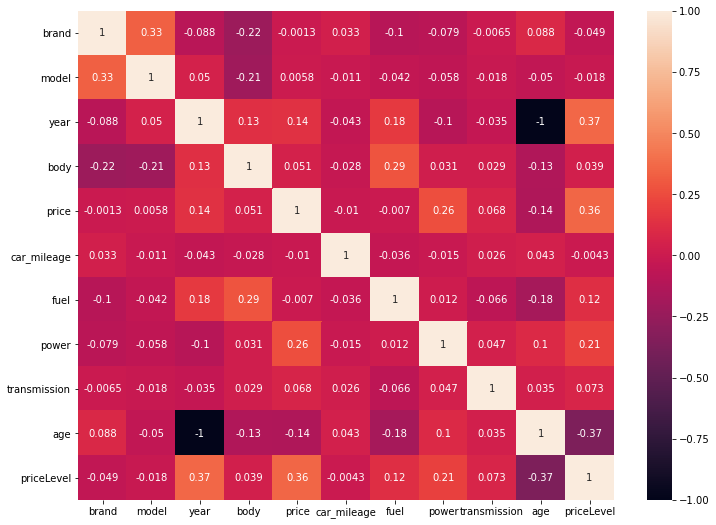

In [7]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

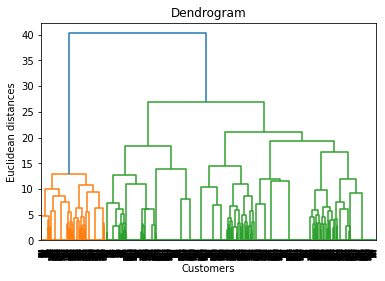

In [8]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [9]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [10]:
hc

array([0, 0, 0, ..., 1, 3, 0], dtype=int64)

In [11]:
# Less features
X = df.iloc[:, [2,7,9]]

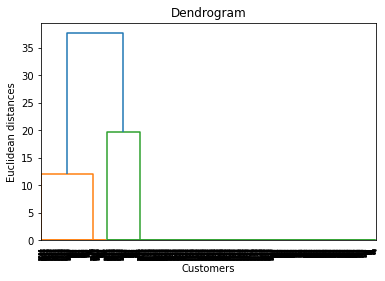

In [12]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [14]:
# Export hc clusters
import pickle
obj = {'hc': hc}
output = open('clust.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()